# <center> Astronomicala Data - Visualizations

In [2]:
#!pip install pandas

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
aus_df=pd.read_csv("cleaned_star_data.csv")
#aus_df.head()
#aus_df.info()
aus_df.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [12]:
# convert kelvin to celsius
aus_df["Temperature (C)"]=aus_df["Temperature (K)"]-273.15
aus_df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Temperature (C)
0,3068,0.002400,0.1700,16.12,0,Red,M,2794.85
1,3042,0.000500,0.1542,16.60,0,Red,M,2768.85
2,2600,0.000300,0.1020,18.70,0,Red,M,2326.85
3,2800,0.000200,0.1600,16.65,0,Red,M,2526.85
4,1939,0.000138,0.1030,20.06,0,Red,M,1665.85


In [62]:
## make a folder to store/save plots
folder_name = "plots"
#os.makedirs(folder_name, exist_ok=True)
base_der=f'./{folder_name}/'


### Observations
**1)** Dataset consists of 240 rows, 6 feature and 1 target columns,
- *Absolute Temperature (in K)*    
- *Relative Luminosity (L/Lo)*
- *Relative Radius (R/Ro)*
- *Absolute Magnitude (Mv)*
- *Star Color*
- *Spectral Class*
- *Star Type (Target classes)*
    
Here,
- *Lo = 3.828 x 10^26 Watts (Avg Luminosity of Sun)*
- *Ro = 6.9551 x 10^8 m (Avg Radius of Sun)*
    
**2)** Two categorical features (object type) which will need some kind of encoding,
- *Star Color*
- *Spectral Class*

**3)** It consists of some different features of stars. Information on the star type is given below,       
- **0** → Brown Dwarf       
- **1** → Red Dwarf       
- **2** → White Dwarf      
- **3** → Main Sequence    
- **4** → Supergiants      
- **5** → Hypergiants      

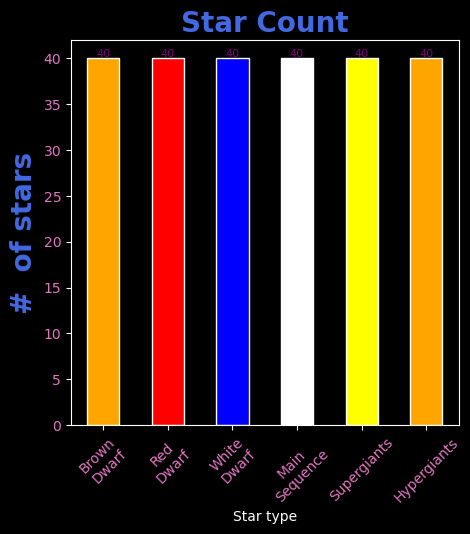

In [64]:
plt.figure(figsize=(5,5))
plt.style.use("dark_background")
plt.title("Star Count",color="royalblue",fontsize=20,weight="bold")
plt.yticks(color="tab:pink")
# add labels on x axis Brown Dwarf,Red Dwarf,White Dwarf,Main Sequence,Supergiants,Hypergiants
plt.ylabel("#  of stars",color="royalblue",fontsize=20,weight="bold")
ax=aus_df["Star type"].value_counts().plot(kind="bar",color=["orange","red","blue","white","yellow"],edgecolor="white",width=0.5)
#add count on top of bars
ax.bar_label(ax.containers[0],color="purple",fontsize=8)

plt.xticks(ticks=[0,1,2,3,4,5],labels=["Brown\nDwarf","Red\nDwarf","White\nDwarf","Main\nSequence","Supergiants","Hypergiants"],rotation=45,color="tab:pink")
plt.savefig(base_der+"bar_plot.png")
plt.show()

## <center> Bar Plot using Seaborn

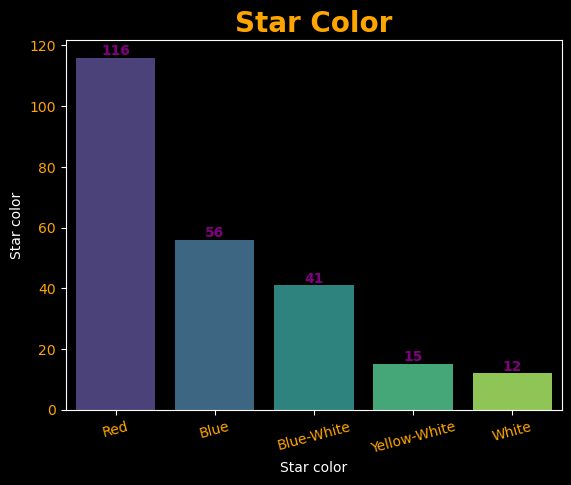

In [82]:
ax=sns.barplot(x=aus_df["Star color"].value_counts().index,y=aus_df["Star color"].value_counts(),palette="viridis") #"Blues_d"
ax.bar_label(ax.containers[0],fontsize=10,color="purple",weight="bold")
plt.xticks(rotation=15,color="orange")
plt.yticks(color="orange")
plt.ylabel("Star color",color="white")
plt.title("Star Color",color="orange",weight="bold",fontsize=20)
plt.savefig(base_der+"Star_color.png")
plt.show()

## <center> Sub Plot in Seaborn

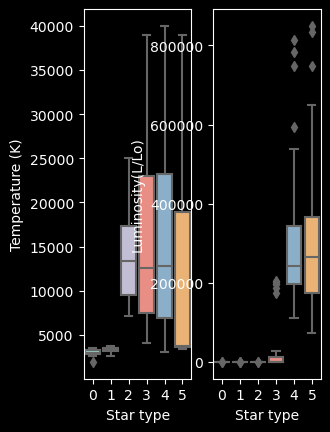

In [88]:
plt.subplot(1,4,1)
sns.boxplot(x=aus_df["Star type"],y=aus_df.iloc[:,0])
plt.subplot(1,4,2)
sns.boxplot(x=aus_df["Star type"],y=aus_df.iloc[:,1])
plt.show()